# Build a classification decision tree Damien Bukudjian

We illustrate how **decision tree** fit data with a simple **classification**
problem using the **penguins dataset**.

In [2]:
import pandas as pd

penguins = pd.read_csv("penguins_classification.csv")
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

Besides, we **split the data** into two subsets, a **training** and a **test set**, to investigate how trees will **predict** values based **on** an **out-of-sample** dataset.

In [76]:
from sklearn.model_selection import train_test_split
x = penguins.drop("Species", axis=1)
y = penguins["Species"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In a previous notebook, we learnt that a linear classifier will define a
linear separation to split classes using a linear combination of the input
features. In our 2-dimensional space, it means that a linear classifier will
define some oblique lines that best separate our classes. We define a
function below that, given a set of data points and a classifier, **plot
the decision boundaries** learnt by the classifier.

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone

def color_mapping(x):
        colors = ['blue', 'red', 'purple', 'brown', 'yellow', 'green', 'darkblue', 'magenta']
        return colors[x]

def plot_decision_function(x,y,fitted_classifier, range_features, ax=None):
    """Plot the boundary of the decision function of a classifier."""
    le = LabelEncoder()
    feature_names = list(x.keys())
    le.fit(feature_names)
    tr = le.transform(le.classes_)
    

    X_sample = x[feature_names].sample(300)
    y_sample = y[X_sample.index].astype("category").cat.codes
    
    model_plot = clone(fitted_classifier)
    model_plot.fit(X_sample, y_sample)
    y_color = y_sample.map(color_mapping)

    x_grid, y_grid = np.arange(0, 1.01, 0.1), np.arange(0, 1.01, 0.1)
    xx_mesh, yy_mesh = np.meshgrid(x_grid, y_grid)
    xx, yy = xx_mesh.ravel(), yy_mesh.ravel()
    X_grid = pd.DataFrame([xx, yy]).T

    zz = model_plot.predict(X_grid)
    zz = zz.reshape(xx_mesh.shape)

    plt.figure(figsize=(10, 10))
    plt.scatter(X_sample.iloc[:, 0], X_sample.iloc[:, 1], color=y_color)
    plt.contourf(xx_mesh, yy_mesh, zz, alpha=0.3)
    plt.xlabel(feature_names[0]), plt.ylabel(feature_names[1]), plt.title('Decision boundary')
    plt.show()
    return xx_mesh, yy_mesh

Thus, for a **linear classifier**, we obtain the following **decision
boundaries**. These boundary lines indicate where the model changes its
prediction from one class to another.

C:\Users\damie\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


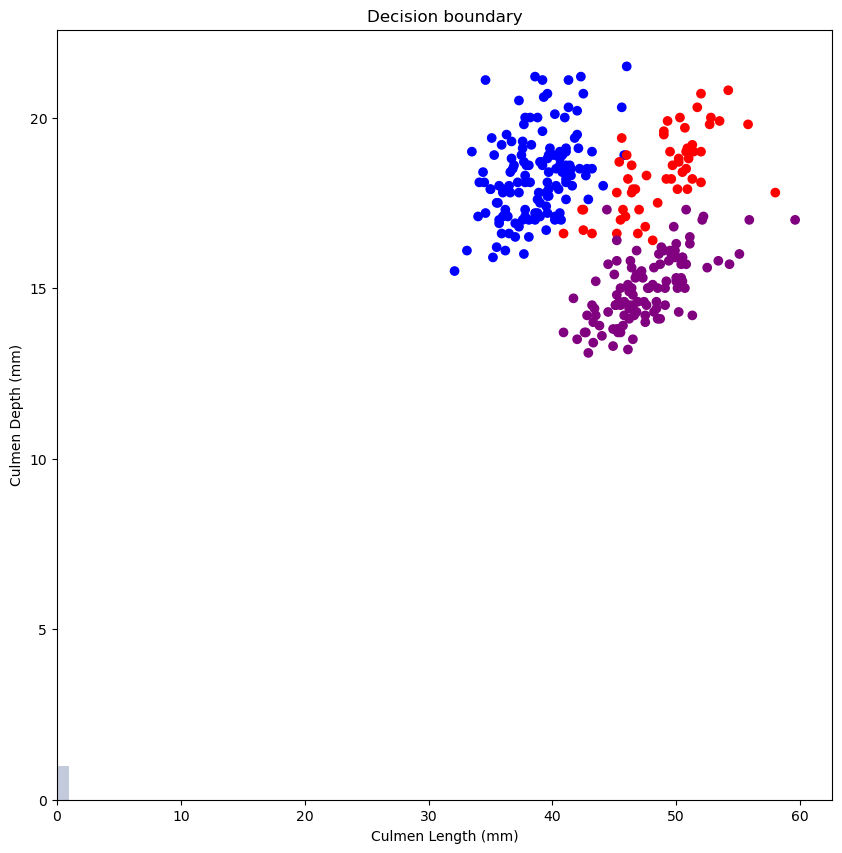

(array([[0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
        [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
        [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
        [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
        [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
        [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
        [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
        [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
        [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
        [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
        [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]]),
 array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
        [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2],
        [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3],
        [0.4, 0.4, 0.4,

In [98]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=1)
clf.fit(X_train, y_train)
plot_decision_function(x,y,clf,penguins)


<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

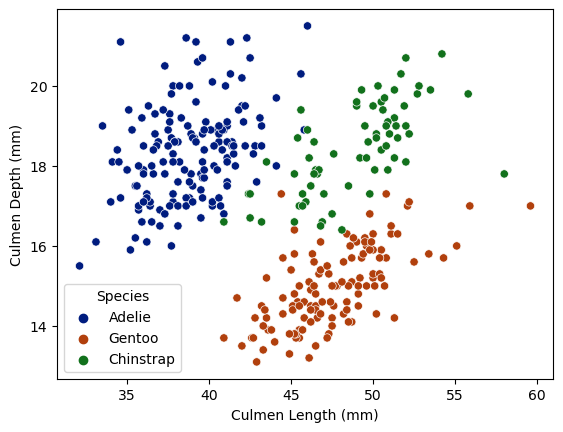

In [91]:
import seaborn as sns
sns.scatterplot(data=penguins, x="Culmen Length (mm)", y="Culmen Depth (mm)", palette='dark', hue="Species")

We see that the **decision boundaries** are a **combination of the input features** since they are **not perpendicular to a specific axis**. Indeed, this is **due to the model
parametrization** that we saw in the previous notebook, controlled by the
model's **weights and intercept**.

Besides, it seems that the linear model would be a good candidate for
such problem as it gives good **accuracy**.

In [ ]:
linear_model.fit(data_train, target_train)
test_score = #your code
print(f"Accuracy of the LogisticRegression: {test_score:.2f}")

Accuracy of the LogisticRegression: 0.98


Unlike linear models, decision **trees** are **non-parametric models**: they are not
controlled by a mathematical decision function and do **no**t have **weights or
intercept** to be **optimized**.

Indeed, **decision trees partition the feature space** by **considering a single
feature at a time**. Let's **illustrate** this behaviour by having a decision
tree make a **single split** to partition the feature space.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#your code

DecisionTreeClassifier(max_depth=1)

C:\Users\R21\anaconda3\envs\dl\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


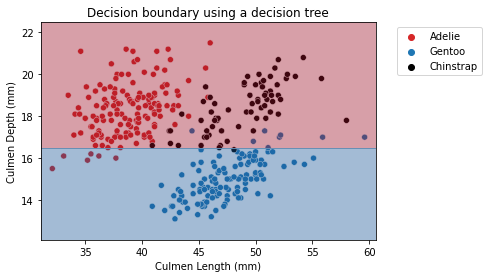

In [ ]:
ax = sns.scatterplot(data=penguins, x=culmen_columns[0], y=culmen_columns[1],
                     hue=target_column, palette=palette)
plot_decision_function(tree, range_features, ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
_ = plt.title("Decision boundary using a decision tree")

The **partitions** found by the **algorithm separates** the **data along the axis
"Culmen Depth"**, discarding the feature "Culmen Length". Thus, it highlights
that a **decision tree** does **not use a combination of features** when **making a
split**. We can look more in depth at the tree structure.

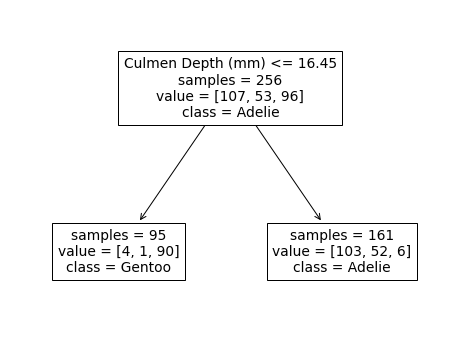

In [ ]:
from sklearn.tree import plot_tree

#your code

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p class="last">We are using the function <tt class="docutils literal">fig, ax = <span class="pre">plt.subplots(figsize=(8,</span> 6))</tt> to create
a figure and an axis with a specific size. Then, we can pass the axis to the
<tt class="docutils literal">sklearn.tree.plot_tree</tt> function such that the drawing happens in this axis.</p>
</div>

We see that the **split** was done **along** the **culmen depth feature**. The original
dataset was divided into 2 sets based on the culmen depth
(inferior or superior to 16.45 mm).

This **partition** of the dataset **minimizes** the **class diversities in** each
**sub-partitions**. This **measure** is also known as a **criterion**,
and is a settable parameter.

If we look more closely at the partition, we see that **superior to
16.45** the **Adelie class is the majority**. Indeed, there are
103 Adelie individuals in this partition, but also 52 Chinstrap
samples and 6 Gentoo samples. **Inferior to 16.45mm** the **majority class** is the **Gentoo species**.

Let's see how our **tree works as a predictor**. If the culmen depth is **inferior to the threshold**:

In [ ]:
#your code

C:\Users\R21\anaconda3\envs\dl\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Gentoo'], dtype=object)

The class predicted is the Gentoo. Also, for culmen
depth **superior to the threshold**:

In [ ]:
#your code

C:\Users\R21\anaconda3\envs\dl\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Adelie'], dtype=object)

In this case, the tree predicts the Adelie species.

Thus, we can conclude that a **decision tree classifier will predict the majority class** within a partition.

During the training, we have a count of samples in each partition, we can
also compute the **probability** of belonging to a specific class within this
partition.

In [ ]:
#your code

C:\Users\R21\anaconda3\envs\dl\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


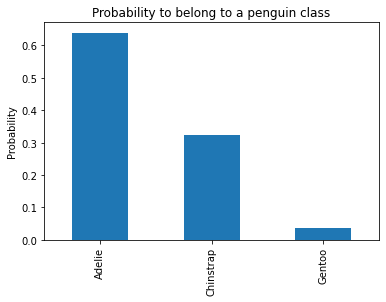

In [ ]:
#your code

We will **manually compute** the different **probability** directly from the tree
structure.

In [ ]:
adelie_proba = 103 / 161
chinstrap_proba = 52 / 161
gentoo_proba = 6 / 161
print(f"Probabilities for the different classes:\n"
      f"Adelie: {adelie_proba:.3f}\n"
      f"Chinstrap: {chinstrap_proba:.3f}\n"
      f"Gentoo: {gentoo_proba:.3f}\n")

Probabilities for the different classes:
Adelie: 0.640
Chinstrap: 0.323
Gentoo: 0.037



It is also important to note that the **culmen length** has been **disregarded** for
the moment. It means that whatever the value given, it will not be used
during the prediction.

In [ ]:
tree.predict_proba([[10000, 17]])

C:\Users\R21\anaconda3\envs\dl\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0.63975155, 0.32298137, 0.03726708]])

Going back to our classification problem, the **split** found with a **maximum
depth of 1** is **not powerful enough** to separate the three species and the model
**accuracy is low** when compared with the linear model's 0.98 accuracy.

In [ ]:
tree.fit(data_train, target_train)
test_score = tree.score(data_test, target_test)
print(f"Accuracy of the DecisionTreeClassifier: {test_score:.2f}")

Accuracy of the DecisionTreeClassifier: 0.78


Indeed, it is not a surprise. We saw earlier that **a single feature** will **not**
be able to **separate** all **three species**. However, from the previous analysis we
saw that by using **both features** we should be able to get **fairly good results**.

In the next exercise, you will **increase the size of the tree depth**. You will
get intuitions on how to **grow a tree** and how the **partitioning is repeated**.